# Notebook for calculating VGPs and dispersion S

It contains the calculation of __VGPs__ from a __Dec__, __Inc__, __$\alpha_{95}$__, __Slat__, __Slon__ table (text file) and dispersion __S__ of __VGPS__ with bootstraping confidence regions using fixed or variable cutoff (Vandamme, 1994).  


First you have to upload a text file with the columns: Dec Inc alpha95 Slat Slon using the buttom 'upload'.  

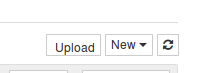



 
 __VGPs__  - Virtual Geomagnetic Poles  
 __Dec__ and __Inc__ - Declination and Inclination of magnetization  
 __$\alpha_{95}$__ - Angle of 95% confidence of the direction(Fisher 1953).  
 __Slat__ and __Slon__ - Latitude and Longitude of the site   
 
   
     
       
         
           
 
 
 The example file 'Example1.dat' are data from Kiaman times (Bazhenov et al., 2016)
   
     
       
         
           
 
 
 
# For runing the cells: __select the cell__ and press __Shift+Enter__



# RUN the bellow parts

### For runing the cells: select the cell and press Shift+Enter

[\*] means that the cell is runing

[a number inside] means that the cell has already run

[] - empty means that the cell hasn't run yet


In [ ]:
import Dani_utilities_for_Git as db
import numpy as np

name_of_file = 'Example1.dat'

DI = np.loadtxt(name_of_file)

print('Your data:')
print('# \tDec \tInc \ta95 \tSLat \tSlon')
for j in range(len(DI)):
    print('%.i \t%.1f \t%.1f \t%.1f \t%.1f \t%.1f' %((j+1), DI[j,0],DI[j,1],DI[j,2],DI[j,3], DI[j,4]))

# Calculating VGPs and dp/dm confidence limits

In [ ]:
VGPS = db.dir2vgp_severalplaces(DI)
print('The VGPs:')
print('Number \tVGPLon \tVGPLat \tdm \tdp')
for j in range(len(DI)):
    print('%.i \t%.1f \t%.1f \t%.1f \t%.1f' %((j+1), VGPS[j,0],VGPS[j,1],VGPS[j,2],VGPS[j,3]))

# Calculating the Dispersion S from VGPS:

## What kind of cut-off you want?

If you want __Vandamme__ iterative method set: __vand=1__ and __A=0__

If you want __Fixed cutoff__ set __vand=0__ and __A__ with the value that you want to cut, you can put 45º for example (__A=45__)

Set also the __number of bootstrap realizations__ you want. Example: NB = 1000.

In [ ]:
vand = 1
A = 0
NB = 1000

# RUN the bellow parts

### For runing the cells: select the cell and press Shift+Enter

[\*] means that the cell is runing

[a number inside] means that the cell has already run

[] - empty means that the cell hasn't run yet

Calculating the number of sites "N":

In [ ]:
N = len(DI)

Calculating the Dispersion "S" of VGPS

In [ ]:
S = db.dispS(VGPS[:,0:2])

Bootstraping

In [ ]:
Sboot = db.dispS_boot(VGPS[:,0:2],NB)

Calculating the S value using a cutoff angle

In [ ]:
if NB==0:
    boot=0.
else:
    boot=1
Scut = db.Scut(VGPS[:,0:2], boot,vand, A, NB)

Searching for the discarded data:

In [ ]:
VGPS_c=db.Cut_VGPS(VGPS,vand,A)

### Print the results

Where:

__N__ is the total number of data  
__S__ is the dispersion of VGPS  
__Sl__ is the lower limit of the 95% of confidence (using NB bootstraping realizations)  
__Su__ is the upper limit of the 95% of confidence (using NB bootstraping realizations)  

__Ncut__ is the total number of data that remained after the use of a cutoff angle  
__Scut__ is the dispersion of VGPS that remained after the use of a cutoff angle  	
__Scutl__ and __Scutu__ are the limits of 95% of confidence (using NB bootstraping realizations)  
__Acut__ is the final cutoff angle.  

__Y-1/No-0__ 1 for considered data and 0 for cutted data  




In [ ]:
print('# \tDec \tInc \ta95 \tSLat \tSlon \tVGPLon \tVGPLat \tdm \tdp \tY-1/No-0')
for j in range(len(DI)):
    print('%i \t%.1f \t%.1f \t%.1f \t%.1f \t%.1f \t%.1f \t%.1f \t%.1f \t%.1f \t%i' 
        %((j+1),DI[j,0],DI[j,1],DI[j,2],DI[j,3],DI[j,4], VGPS[j,0],VGPS[j,1],VGPS[j,2],VGPS[j,3],int(VGPS_c[j,2])))
print('')
print('N \tS \tSl \tSu \tNcut \tScut \tScutl \tScutu \tAcut')
print('%i \t%.1f \t%.1f \t%.1f \t%i  \t%.1f \t%.1f \t%.1f \t%.1f\n'
                 %(N, S, Sboot[0], Sboot[1], Scut[0],Scut[1],Scut[2],Scut[3],Scut[4]))